In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
#reading the datset to the pythin environment
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
data.shape

(167, 10)

In [89]:
data.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [92]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [93]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There is no null values in the dataset

In [94]:
# Converting exports,imports and health spending percentages to absolute values.

data['exports'] = data['exports'] * data['gdpp']/100
data['imports'] = data['imports'] * data['gdpp']/100
data['health'] = data['health'] * data['gdpp']/100

In [95]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [96]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


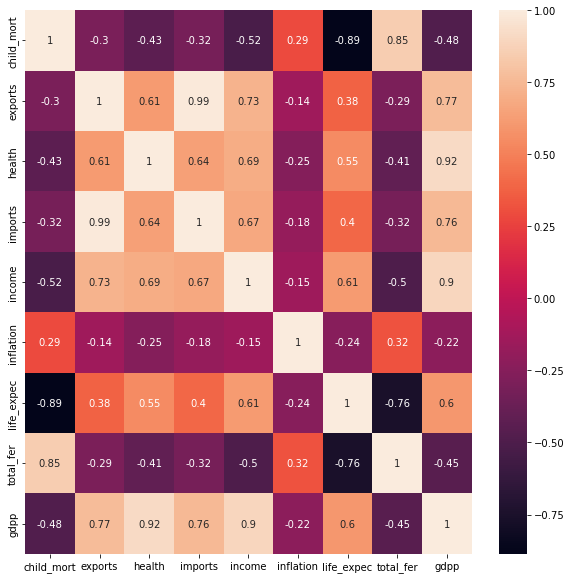

In [97]:
#Data Visualization
plt.figure(figsize = (10,10))  
ax = sns.heatmap(data.corr(),annot = True)

child_mortality and life_expentency are highly correlated with correlation of -0.89
child_mortality and total_fertility are highly correlated with correlation of 0.85
imports and exports are highly correlated with correlation of 0.74
life_expentency and total_fertility are highly correlated with correlation of -0.76

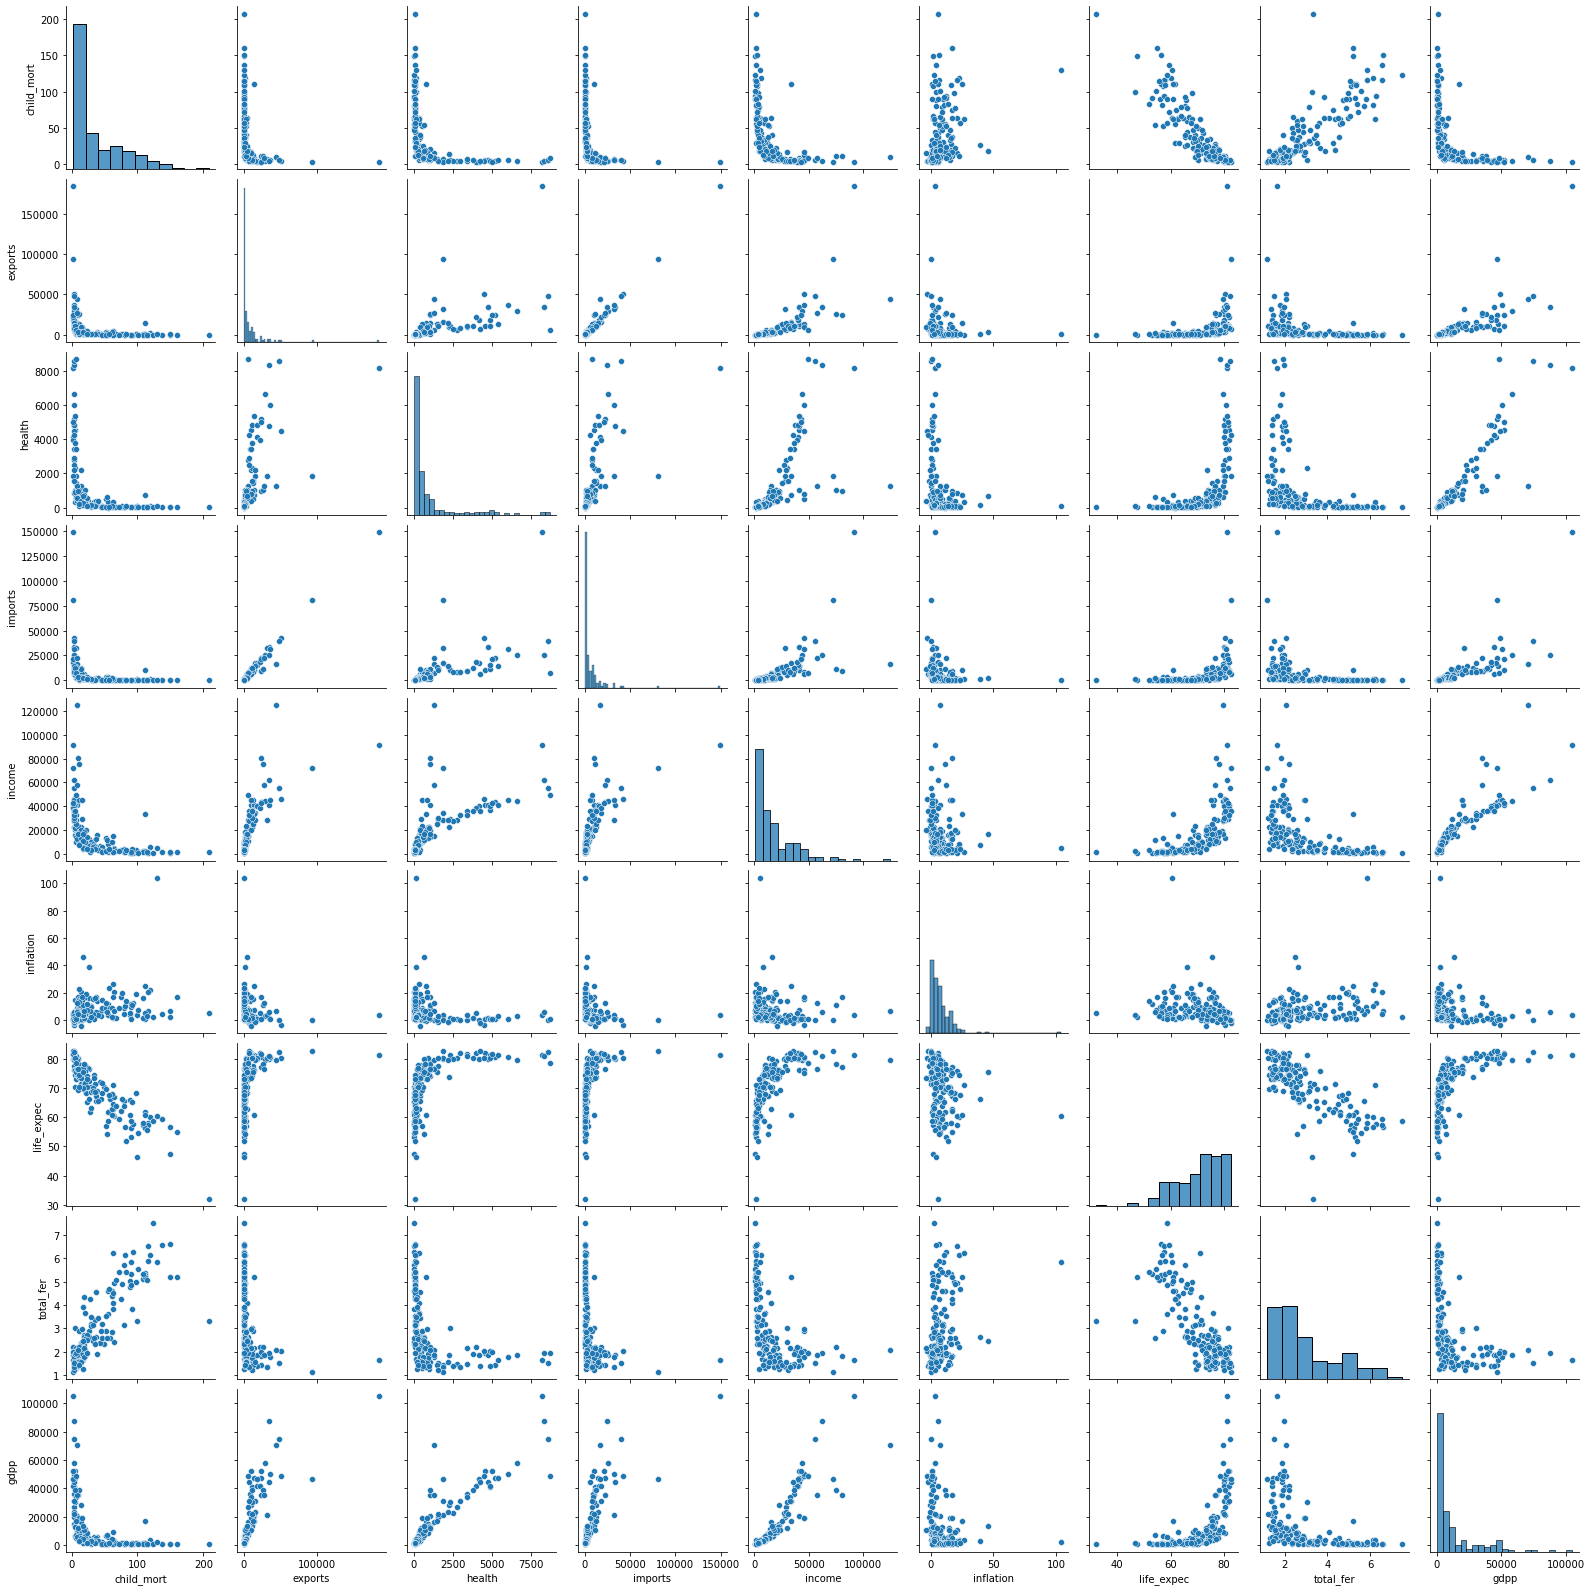

In [99]:
#Pairplot of all the numeric columns
sns.pairplot(data)

In [ ]:
#Outlier Analysis

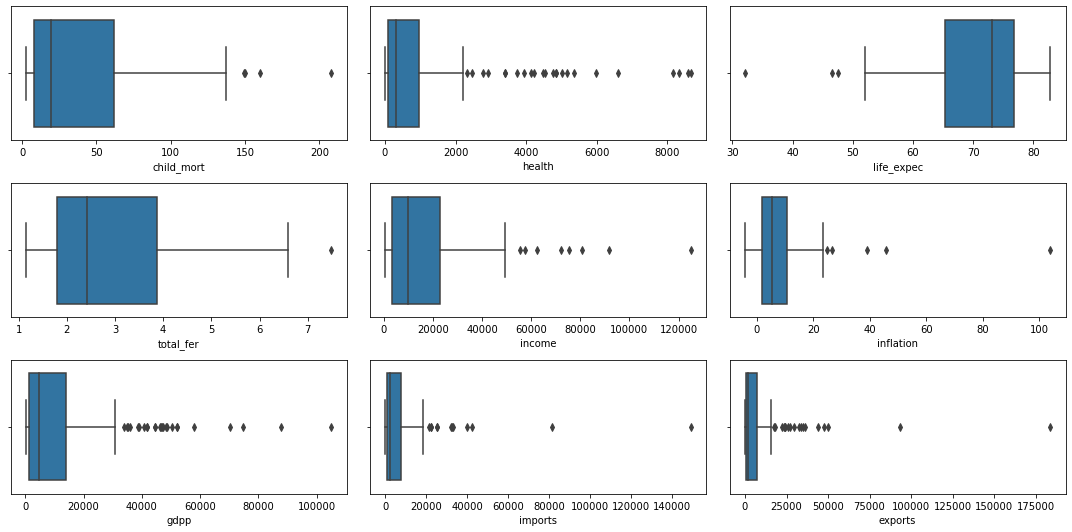

In [100]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))
plt1 = sns.boxplot(data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data['health'], ax = axs[0,1])
plt3 = sns.boxplot(data['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data['income'], ax = axs[1,1])
plt6 = sns.boxplot(data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data['exports'], ax = axs[2,2])

plt.tight_layout()

There are outliers in the dataset which need to be handled

In [101]:
# Keeping a copy of original data  before manipulating
data1 = data.copy()
data1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [102]:
#Outlier Handling 
percentiles = data1['income'].quantile([0.05,0.95]).values
data1['income'][data1['income'] <= percentiles[0]] = percentiles[0]
data1['income'][data1['income'] >= percentiles[1]] = percentiles[1]

percentiles = data1['inflation'].quantile([0.05,0.95]).values
data1['inflation'][data1['inflation'] <= percentiles[0]] = percentiles[0]
data1['inflation'][data1['inflation'] >= percentiles[1]] = percentiles[1]

percentiles = data1['gdpp'].quantile([0.05,0.95]).values
data1['gdpp'][data1['gdpp'] <= percentiles[0]] = percentiles[0]
data1['gdpp'][data1['gdpp'] >= percentiles[1]] = percentiles[1]

percentiles = data1['imports'].quantile([0.05,0.95]).values
data1['imports'][data1['imports'] <= percentiles[0]] = percentiles[0]
data1['imports'][data1['imports'] >= percentiles[1]] = percentiles[1]

percentiles = data1['exports'].quantile([0.05,0.95]).values
data1['exports'][data1['exports'] <= percentiles[0]] = percentiles[0]
data1['exports'][data1['exports'] >= percentiles[1]] = percentiles[1]



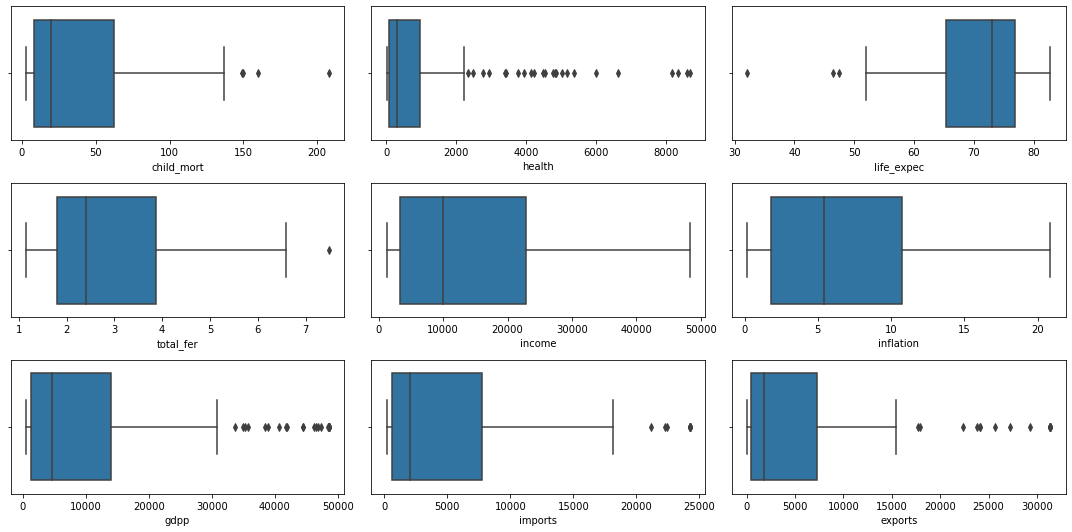

In [103]:
fig, axs = plt.subplots(3,3, figsize = (15,7.5))

plt1 = sns.boxplot(data1['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(data1['health'], ax = axs[0,1])
plt3 = sns.boxplot(data1['life_expec'], ax = axs[0,2])
plt4 = sns.boxplot(data1['total_fer'], ax = axs[1,0])
plt5 = sns.boxplot(data1['income'], ax = axs[1,1])
plt6 = sns.boxplot(data1['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(data1['gdpp'], ax = axs[2,0])
plt8 = sns.boxplot(data1['imports'], ax = axs[2,1])
plt9 = sns.boxplot(data1['exports'], ax = axs[2,2])

plt.tight_layout()

In [104]:
#Scaling
from sklearn.preprocessing import StandardScaler
data1=data.drop('country',axis=1)
scaler=StandardScaler()
data1=scaler.fit_transform(data1)

1503.0000000000002
942.2066009265523
651.3820515830141
479.7626221881618
400.6623066122528
348.24781112021486
305.7889710639165
268.95526826474173
239.97347821074544
221.2854901795552


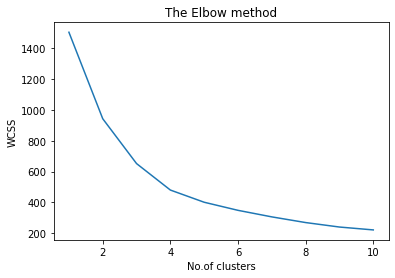

In [105]:
#K-Means Clustering
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
     kmeans.fit(data1)
     wcss.append(kmeans.inertia_)
     print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()


In [106]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

In [107]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(data1)
kmeans.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [131]:
df_km1 = pd.concat([data, pd.Series(kmeans.labels_)], axis = 1)
df_km1.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [109]:
df_km1['cluster_id'].value_counts()

2    91
1    48
0    28
Name: cluster_id, dtype: int64

KMeans cluster visualizations

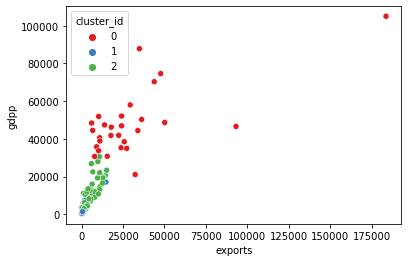

In [110]:
sns.scatterplot(x = 'exports', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

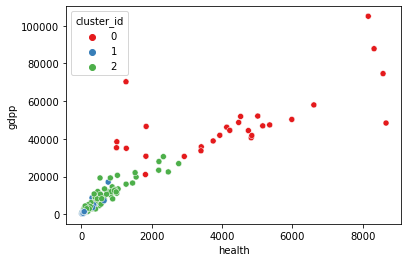

In [111]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

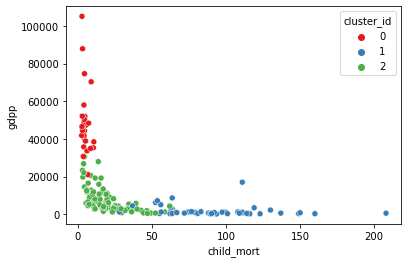

In [112]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

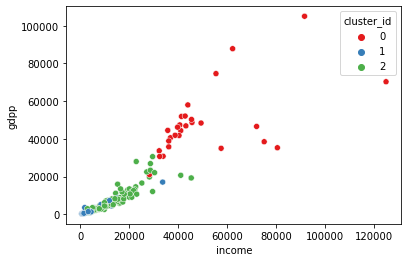

In [113]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

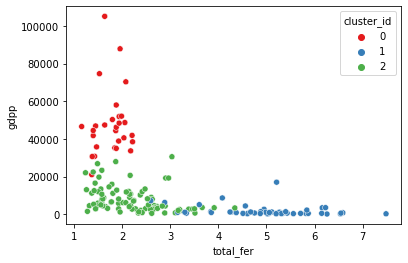

In [114]:
sns.scatterplot(x = 'total_fer', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

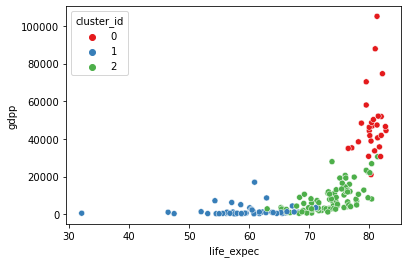

In [115]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

In [84]:
#Finding the observations that belong to cluster id 1
df_km1[df_km1['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [116]:
top_kmeans = df_km1[df_km1['cluster_id']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
2,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1
3,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
4,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1
5,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,1
6,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,1
7,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
8,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,1
9,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,1


In [118]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


These are the top ten countries which in need of helpbased on socio economic and health factors using KMeans Clustering

Agglomerative Heirarchial Clustering


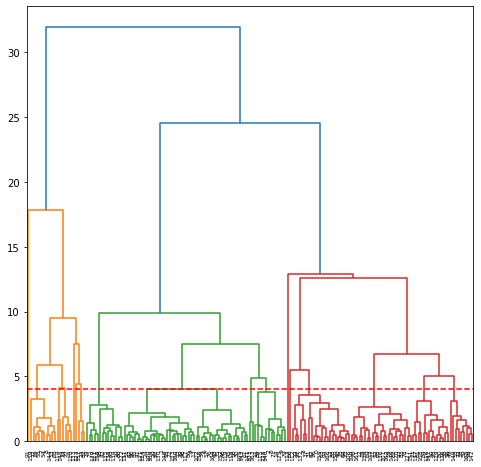

In [119]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize = (8,8))
dendro = linkage(data1,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(4,0,27000,colors="red",linestyles="dashed")
plt.show()

In [120]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
labels=cluster.fit_predict(data1)
labels

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [121]:
df_hm = pd.concat([data, pd.Series(labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [122]:
df_hm['cluster_labels'].value_counts()

2    75
1    70
0    22
Name: cluster_labels, dtype: int64

Heirarichal Clusters Visulaisation

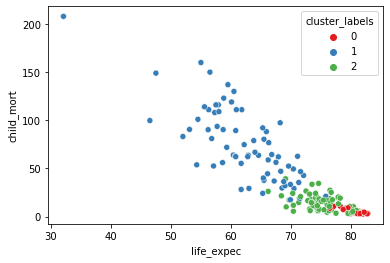

In [123]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

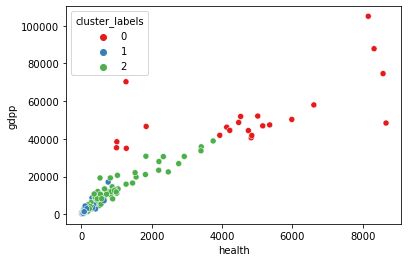

In [124]:
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

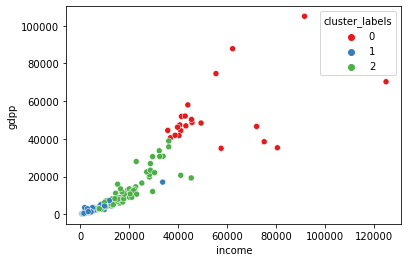

In [125]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

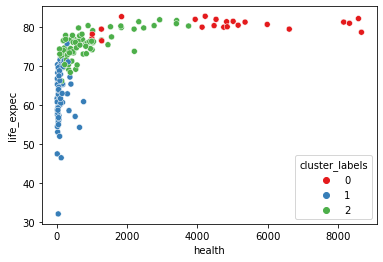

In [126]:
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

Here we can see  cluster_id 1 is having very low gdpp and income with a very high child_mort rate so this will be our focus of help.

In [127]:
df_hm[df_hm['cluster_labels']==1]['country']

0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
18          Bhutan
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 70, dtype: object

In [128]:
top_h = df_hm[df_hm['cluster_labels']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,1
1,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,1
2,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,1
3,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,1
4,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,1
5,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,1
6,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,1
7,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
8,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,1
9,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,1


In [129]:
#Obtaining top 10 countries which are in dire need of help.
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


These are the top ten countries which in need of help based on socio economic and health factors using Agglomerative Heirarchial Clustering
